# CNN Image Classification Laboration


Images used in this laboration are from CIFAR 10 (https://en.wikipedia.org/wiki/CIFAR-10). The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class. Your task is to make a classifier, using a convolutional neural network, that can correctly classify each image into the correct class.

You need to answer all questions in this notebook. 

## Part 1: What is a convolution

To understand a bit more about convolutions, we will first test the convolution function in scipy using a number of classical filters. 

Convolve the image with Gaussian filter, a Sobel X filter, and a Sobel Y filter, using the function 'convolve2d' in 'signal' from scipy.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

In a CNN, many filters are applied in each layer, and the filter coefficients are learned through back propagation (which is in contrast to traditional image processing, where the filters are designed by an expert).

In [1]:
# This cell is finished

from scipy import signal
import numpy as np

# Get a test image
from scipy import misc
image = misc.ascent()

# Define a help function for creating a Gaussian filter
def matlab_style_gauss2D(shape=(3,3),sigma=0.5):
    """
    2D gaussian mask - should give the same result as MATLAB's
    fspecial('gaussian',[shape],[sigma])
    """
    m,n = [(ss-1.)/2. for ss in shape]
    y,x = np.ogrid[-m:m+1,-n:n+1]
    h = np.exp( -(x*x + y*y) / (2.*sigma*sigma) )
    h[ h < np.finfo(h.dtype).eps*h.max() ] = 0
    sumh = h.sum()
    if sumh != 0:
        h /= sumh
    return h

# Create Gaussian filter with certain size and standard deviation
gaussFilter = matlab_style_gauss2D((15,15),4)

# Define filter kernels for SobelX and Sobely
sobelX = np.array([[ 1, 0,  -1],
                    [2, 0, -2],
                    [1, 0, -1]]) 

sobelY = np.array([[ 1, 2,  1],
                    [0, 0, 0],
                    [-1, -2, -1]]) 

In [2]:
# Perform convolution using the function 'convolve2d' for the different filters
filterResponseGauss = signal.convolve2d(image, gaussFilter)
filterResponseSobelX = signal.convolve2d(image, sobelX)
filterResponseSobelY = signal.convolve2d(image, sobelY)

#mode same
filterResponseGauss_same = signal.convolve2d(image, gaussFilter, mode = 'same')
filterResponseSobelX_same = signal.convolve2d(image, sobelX, mode = 'same')
filterResponseSobelY_same = signal.convolve2d(image, sobelY, mode = 'same')

#mode valid
filterResponseGauss_valid = signal.convolve2d(image, gaussFilter, mode = 'valid')
filterResponseSobelX_valid = signal.convolve2d(image, sobelX, mode = 'valid')
filterResponseSobelY_valid = signal.convolve2d(image, sobelY, mode = 'valid')


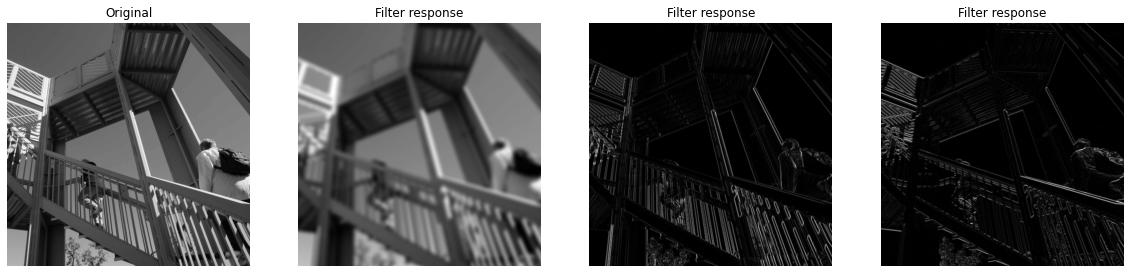

In [3]:
import matplotlib.pyplot as plt

# Show filter responses
fig, (ax_orig, ax_filt1, ax_filt2, ax_filt3) = plt.subplots(1, 4, figsize=(20, 6))
ax_orig.imshow(image, cmap='gray')
ax_orig.set_title('Original')
ax_orig.set_axis_off()
ax_filt1.imshow(np.absolute(filterResponseGauss_valid), cmap='gray')
ax_filt1.set_title('Filter response')
ax_filt1.set_axis_off()
ax_filt2.imshow(np.absolute(filterResponseSobelX_valid), cmap='gray')
ax_filt2.set_title('Filter response')
ax_filt2.set_axis_off()
ax_filt3.imshow(np.absolute(filterResponseSobelY_valid), cmap='gray')
ax_filt3.set_title('Filter response')
ax_filt3.set_axis_off()

##  Part 2: Understanding convolutions

Question 1: What do the 3 different filters (Gaussian, SobelX, SobelY) do to the original image?

Answer 1: The Gaussian filter applies the gaussian kernel to the image. Because the filter is gaussian so it serves to smoothen the image by assigning a higher weight to the pixels at the center of the filter. This results in a gaussian blur on the image which helps in edge detection when followed by the Sobel filters. The SobelX filter detects for changing values when spanning from left to right, similarly, the SobelY filter detects for changing values from top to bottom. Thus the SobelX is a filter for vertical edge detection and SobelY is a filter for horizontal edge detection. The Gaussian filter is a low pass filter, while the Sobel filter is used as a follow up to the gaussian as a high pass filter.

Question 2: What is the size of the original image? How many channels does it have? How many channels does a color image normally have?

Answer 2: The size of the original image as printed below is 512x512 px. It has only 1 channels since it is a greyscale image of only one of the primary colors, but generally a color image has 3 channels corresponding to RGB.

Question 3: What is the size of the different filters?

Answer 3: printed below

Question 4: What is the size of the filter response if mode 'same' is used for the convolution ?

Answer 4: printed below

Question 5: What is the size of the filter response if mode 'valid' is used for the convolution? How does the size of the valid filter response depend on the size of the filter? 

Answer 5: filter size printed below. Valid convolution is done without padding, so if we are convolving a nxn image with fxf filter, the the filter response will be (n-f+1)x(n-f+1). For eg, in this case the 512x512 image is convolved with 15x15 gauss filter and the resulting response is a (512-15+1)x(512-15+1) i.e. 498x498.

Question 6: Why are 'valid' convolutions a problem for CNNs with many layers?
Valid convolutions can run into problems of shrinking image sizes in deep CNNs. Evertime we use a valid convolution, we are left with a smaller image and after a number of convolutions, we can be left with an image that is too small or has too little imformation.


In [4]:
# Your code for checking sizes of image and filter responses

#original image size
print("The size of the image is:{}" .format(np.shape(image)))

#size of filters
print("The size of the Gaussian filter is:{}" .format(np.shape(gaussFilter)))
print("The size of the SobelX filter is:{}" .format(np.shape(sobelX)))
print("The size of the SobelY filter is:{}" .format(np.shape(sobelY)))

#filter response sizes
print("The size of the Gaussian filter response is:{}" .format(np.shape(filterResponseGauss)))
print("The size of the SobelX filter is:{}" .format(np.shape(filterResponseSobelX)))
print("The size of the SobelY filter is:{}" .format(np.shape(filterResponseSobelY)))

#filter response sizes with 'same' mode
print("The size of the 'same' Gaussian filter response is:{}" .format(np.shape(filterResponseGauss_same)))
print("The size of the 'same' SobelX filter is:{}" .format(np.shape(filterResponseSobelX_same)))
print("The size of the 'same' SobelY filter is:{}" .format(np.shape(filterResponseSobelY_same)))

#filter response sizes with 'valid' mode
print("The size of the 'valid' Gaussian filter response is:{}" .format(np.shape(filterResponseGauss_valid)))
print("The size of the 'valid' SobelX filter is:{}" .format(np.shape(filterResponseSobelX_valid)))
print("The size of the 'valid' SobelY filter is:{}" .format(np.shape(filterResponseSobelY_valid)))


The size of the image is:(512, 512)
The size of the Gaussian filter is:(15, 15)
The size of the SobelX filter is:(3, 3)
The size of the SobelY filter is:(3, 3)
The size of the Gaussian filter response is:(526, 526)
The size of the SobelX filter is:(514, 514)
The size of the SobelY filter is:(514, 514)
The size of the 'same' Gaussian filter response is:(512, 512)
The size of the 'same' SobelX filter is:(512, 512)
The size of the 'same' SobelY filter is:(512, 512)
The size of the 'valid' Gaussian filter response is:(498, 498)
The size of the 'valid' SobelX filter is:(510, 510)
The size of the 'valid' SobelY filter is:(510, 510)


##  Part 3: Get a graphics card

Skip this part if you run on a CPU (recommended)

Let's make sure that our script can see the graphics card that will be used. The graphics cards will perform all the time consuming convolutions in every training iteration.

In [5]:
import os
import warnings

# Ignore FutureWarning from numpy
warnings.simplefilter(action='ignore', category=FutureWarning)

import keras.backend as K
import tensorflow as tf

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
 
# The GPU id to use, usually either "0" or "1";
os.environ["CUDA_VISIBLE_DEVICES"]="1";

# Allow growth of GPU memory, otherwise it will always look like all the memory is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 
#physical_devices

##  Part 4: How fast is the graphics card?

Question 7: Why are the filters used for a color image of size 7 x 7 x 3, and not 7 x 7 ? 

Answer 7: Since, typically color images have 3 channels, the filter used also much account for the dimensions of the channels.

Question 8: What operation is performed by the 'Conv2D' layer? Is it a standard 2D convolution, as performed by the function signal.convolve2d we just tested?

Answer 8: Conv2D doesnt perform the same mathematical convolution that signal.convolve2d performs. The difference is that the Conv2D function doesnt mirror the kernel and is actually calculating the cross correlation.

Question 9: Do you think that a graphics card, compared to the CPU, is equally faster for convolving a batch of 1,000 images, compared to convolving a batch of 3 images? Motivate your answer.



##  Part 5:  Load data
Time to make a 2D CNN. Load the images and labels from keras.datasets, this cell is already finished.

In [68]:
from keras.datasets import cifar10
import numpy as np

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Download CIFAR train and test data
(Xtrain, Ytrain), (Xtest, Ytest) = cifar10.load_data()

print("Training images have size {} and labels have size {} ".format(Xtrain.shape, Ytrain.shape))
print("Test images have size {} and labels have size {} \n ".format(Xtest.shape, Ytest.shape))

# Reduce the number of images for training and testing to 10000 and 2000 respectively, 
# to reduce processing time for this laboration
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

Xtest = Xtest[0:2000]
Ytest = Ytest[0:2000]

Ytestint = Ytest

print("Reduced training images have size %s and labels have size %s " % (Xtrain.shape, Ytrain.shape))
print("Reduced test images have size %s and labels have size %s \n" % (Xtest.shape, Ytest.shape))

# Check that we have some training examples from each class
for i in range(10):
    print("Number of training examples for class {} is {}" .format(i,np.sum(Ytrain == i)))

Training images have size (50000, 32, 32, 3) and labels have size (50000, 1) 
Test images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
 
Reduced training images have size (10000, 32, 32, 3) and labels have size (10000, 1) 
Reduced test images have size (2000, 32, 32, 3) and labels have size (2000, 1) 

Number of training examples for class 0 is 1005
Number of training examples for class 1 is 974
Number of training examples for class 2 is 1032
Number of training examples for class 3 is 1016
Number of training examples for class 4 is 999
Number of training examples for class 5 is 937
Number of training examples for class 6 is 1030
Number of training examples for class 7 is 1001
Number of training examples for class 8 is 1025
Number of training examples for class 9 is 981


##  Part 6: Plotting

Lets look at some of the training examples, this cell is already finished. You will see different examples every time you run the cell.

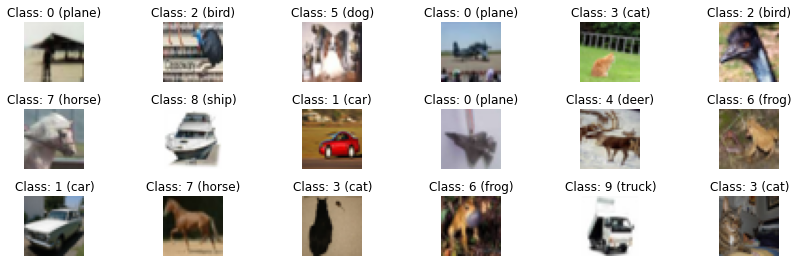

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
for i in range(18):
    idx = np.random.randint(7500)
    label = Ytrain[idx,0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(Xtrain[idx])
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

##   Part 7: Split data into training, validation and testing
Split your training data into training (Xtrain, Ytrain) and validation (Xval, Yval), so that we have training, validation and test datasets (as in the previous laboration). We use a function in scikit learn. Use 25% of the data for validation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [70]:
from sklearn.model_selection import train_test_split

Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.25, random_state=42)

# Print the size of training data, validation data and test data
print('The validation and test data have size {}, {}, {} and {}'.format(Xtrain.shape, Xval.shape, Ytrain.shape, Yval.shape))


The validation and test data have size (7500, 32, 32, 3), (2500, 32, 32, 3), (7500, 1) and (2500, 1)


##  Part 8: Preprocessing of images

Lets perform some preprocessing. The images are stored as uint8, i.e. 8 bit unsigned integers, but need to be converted to 32 bit floats. We also make sure that the range is -1 to 1, instead of 0 - 255. This cell is already finished.

In [71]:
# Convert datatype for Xtrain, Xval, Xtest, to float32
Xtrain = Xtrain.astype('float32')
Xval = Xval.astype('float32')
Xtest = Xtest.astype('float32')

# Change range of pixel values to [-1,1]
Xtrain = Xtrain / 127.5 - 1
Xval = Xval / 127.5 - 1
Xtest = Xtest / 127.5 - 1

##  Part 9: Preprocessing of labels

The labels (Y) need to be converted from e.g. '4' to "hot encoded", i.e. to a vector of type [0, 0, 0, 1, 0, 0, 0, 0, 0, 0] . We use a function in Keras, see https://keras.io/api/utils/python_utils/#to_categorical-function

In [72]:
from tensorflow.keras.utils import to_categorical

# Print shapes before converting the labels
print('The training, validation and test labels have size {}, {} and {}'.format(Ytrain.shape, Yval.shape, Ytest.shape))

# Your code for converting Ytrain, Yval, Ytest to categorical
Ytrain_cat = to_categorical(Ytrain, num_classes=10)
Yval_cat = to_categorical(Yval, num_classes=10)
Ytest_cat = to_categorical(Ytest, num_classes=10)


# Print shapes after converting the labels
print('The training, validation and test labels have size {}, {} and {}'.format(Ytrain_cat.shape, Yval_cat.shape, Ytest_cat.shape))


The training, validation and test labels have size (7500, 1), (2500, 1) and (2000, 1)
The training, validation and test labels have size (7500, 10), (2500, 10) and (2000, 10)


##  Part 10: 2D CNN
Finish this code to create the image classifier, using a 2D CNN. Each convolutional layer will contain 2D convolution, batch normalization and max pooling. After the convolutional layers comes a flatten layer and a number of intermediate dense layers. The convolutional layers should take the number of filters as an argument, use a kernel size of 3 x 3, 'same' padding, and relu activation functions. The number of filters will double with each convolutional layer. The max pooling layers should have a pool size of 2 x 2. The intermediate dense layers before the final dense layer should take the number of nodes as an argument, use relu activation functions, and be followed by batch normalization. The final dense layer should have 10 nodes (= the number of classes in this laboration) and 'softmax' activation. Here we start with the Adam optimizer.

Relevant functions are

`model.add()`, adds a layer to the network

`Dense()`, a dense network layer

`Conv2D()`, performs 2D convolutions with a number of filters with a certain size (e.g. 3 x 3). 

`BatchNormalization()`, perform batch normalization

`MaxPooling2D()`, saves the max for a given pool size, results in down sampling

`Flatten()`, flatten a multi-channel tensor into a long vector

`model.compile()`, compile the model, add " metrics=['accuracy'] " to print the classification accuracy during the training

See https://keras.io/api/layers/core_layers/dense/ and https://keras.io/api/layers/reshaping_layers/flatten/ for information on how the `Dense()` and `Flatten()` functions work

See https://keras.io/layers/convolutional/ for information on how `Conv2D()` works

See https://keras.io/layers/pooling/ for information on how `MaxPooling2D()` works

Import a relevant cost function for multi-class classification from keras.losses (https://keras.io/losses/)

See the following links for how to compile, train and evaluate the model

https://keras.io/api/models/model_training_apis/#compile-method

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

In [73]:
from keras.models import Sequential, Model
from keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.losses import categorical_crossentropy as CCE

# Set seed from random number generator, for better comparisons
from numpy.random import seed
seed(123)

def build_CNN(input_shape, n_conv_layers=2, n_filters=16, n_dense_layers=0, n_nodes=50, use_dropout=False, learning_rate=0.01):

    # Setup a sequential model
    model = Sequential()

    # Add first convolutional layer to the model, requires input shape
    model.add(Conv2D(filters = n_filters,
                     kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu',
                     input_shape = input_shape))
    
    # Add remaining convolutional layers to the model, the number of filters should increase a factor 2 for each layer
    double_filter = n_filters
    for i in range(n_conv_layers-1):
        double_filter = double_filter * 2
        model.add(Conv2D(filters = double_filter,
                         kernel_size = (3,3),
                         padding = 'same',
                         activation = 'relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size = (2,2)))
    
    # Add flatten layer
    model.add(Flatten())
    
    # Add intermediate dense layers
    for i in range(n_dense_layers):
        model.add(Dense(units = n_nodes,
                        activation = 'relu'))
        if use_dropout == True :
            model.add(Dropout(0.5))
        model.add(BatchNormalization())
        
        
    # Add final dense layer
    model.add(Dense(units = 10,
                    activation = 'softmax'))
   
    # Compile model
    model.compile(optimizer = Adam(learning_rate),
                  loss = CCE,
                  metrics = ['accuracy'])
    
    return model

In [74]:
# Lets define a help function for plotting the training results
import matplotlib.pyplot as plt
def plot_results(history):
    
    loss = history.history['loss']
    acc = history.history['accuracy']
    val_loss = history.history['val_loss']
    val_acc = history.history['val_accuracy']
    
    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(loss)
    plt.plot(val_loss)
    plt.legend(['Training','Validation'])

    plt.figure(figsize=(10,4))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(acc)
    plt.plot(val_acc)
    plt.legend(['Training','Validation'])

    plt.show()

## Part 11: Train 2D CNN

Time to train the 2D CNN, start with 2 convolutional layers, no intermediate dense layers, learning rate = 0.01. The first convolutional layer should have 16 filters (which means that the second convolutional layer will have 32 filters).

Relevant functions

`build_CNN`, the function we defined in Part 10, call it with the parameters you want to use

`model.fit()`, train the model with some training data

`model.evaluate()`, apply the trained model to some test data

See the following links for how to train and evaluate the model

https://keras.io/api/models/model_training_apis/#fit-method

https://keras.io/api/models/model_training_apis/#evaluate-method

## 2 convolutional layers, no intermediate dense layers

In [75]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]
#print(input_shape)

# Build model
model1 = build_CNN(input_shape, 
                   n_conv_layers=2)

# Train the model  using training data and validation data
history1 = model1.fit(x = Xtrain, 
                      y = Ytrain_cat,
                      epochs = epochs, 
                      batch_size = batch_size, 
                      validation_data = (Xval, Yval_cat))

Epoch 1/20
75/75 [==============================] - 8s 113ms/step - loss: 4.1149 - accuracy: 0.2791 - val_loss: 2.0481 - val_accuracy: 0.3008
Epoch 2/20
75/75 [==============================] - 8s 108ms/step - loss: 1.5953 - accuracy: 0.4565 - val_loss: 1.8072 - val_accuracy: 0.3448
Epoch 3/20
75/75 [==============================] - 8s 107ms/step - loss: 1.2903 - accuracy: 0.5411 - val_loss: 1.4818 - val_accuracy: 0.4724
Epoch 4/20
75/75 [==============================] - 8s 108ms/step - loss: 1.1510 - accuracy: 0.5967 - val_loss: 1.5498 - val_accuracy: 0.4312
Epoch 5/20
75/75 [==============================] - 8s 108ms/step - loss: 1.0370 - accuracy: 0.6340 - val_loss: 1.3798 - val_accuracy: 0.5112
Epoch 6/20
75/75 [==============================] - 8s 108ms/step - loss: 0.9322 - accuracy: 0.6741 - val_loss: 1.4470 - val_accuracy: 0.5156
Epoch 7/20
75/75 [==============================] - 10s 129ms/step - loss: 0.8250 - accuracy: 0.7093 - val_loss: 1.5675 - val_accuracy: 0.5216
Epoch

In [76]:
# Evaluate the trained model on test set, not used in training or validation
score = model1.evaluate(Xtest, Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 3.7153 - accuracy: 0.4955
Test loss: 3.7153
Test accuracy: 0.4955


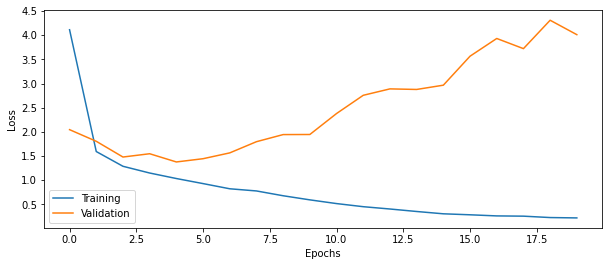

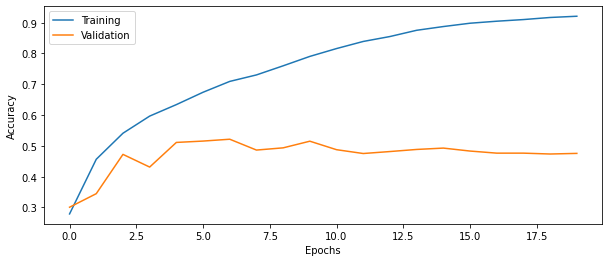

In [77]:
# Plot the history from the training run
plot_results(history1)

## Part 12: Improving performance

Write down the test accuracy, are you satisfied with the classifier performance (random chance is 10%) ? 

The test accuracy is only 49.5%. This accuracy is not very good at classifying unseen data. For a usable model, we need much higher accuracy. 

Question 10: How big is the difference between training and test accuracy?

Answer 10: The training accuracy after 20 epochs was 92% vs 47.5% accuracy on validation and 49.5% on test data. The difference between the validation and test accuracy is only about 3%.

Question 11: For the DNN laboration we used a batch size of 10,000, why do we need to use a smaller batch size in this laboration?

Answer 11: In the DNN lab, we were dealing with a binary classification problem with unbalanced classes. So, the generalization error was not very high. here we have a multiclass problem, due to which we need a model which can generalize to the test data better. Smaller batch sizes generalize better because the smaller batches in a multiclass problem are noisy representations of the overall data which prevent the NN from overfitting and hence generalizes better to test data.

## 2 convolutional layers, 1 intermediate dense layer (50 nodes)

In [78]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model2 = build_CNN(input_shape, 
                   n_conv_layers=2, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=50, 
                   use_dropout=False, 
                   learning_rate=0.01)

# Train the model  using training data and validation data
history2 = model2.fit(x = Xtrain, 
                      y = Ytrain_cat,
                      epochs = epochs, 
                      batch_size = batch_size, 
                      validation_data = (Xval, Yval_cat))

Epoch 1/20
75/75 [==============================] - 8s 113ms/step - loss: 1.7342 - accuracy: 0.3924 - val_loss: 1.7801 - val_accuracy: 0.3700
Epoch 2/20
75/75 [==============================] - 8s 110ms/step - loss: 1.2891 - accuracy: 0.5389 - val_loss: 1.7012 - val_accuracy: 0.3832
Epoch 3/20
75/75 [==============================] - 8s 110ms/step - loss: 0.9876 - accuracy: 0.6480 - val_loss: 1.4185 - val_accuracy: 0.5020
Epoch 4/20
75/75 [==============================] - 8s 111ms/step - loss: 0.7038 - accuracy: 0.7536 - val_loss: 1.3761 - val_accuracy: 0.5464
Epoch 5/20
75/75 [==============================] - 8s 111ms/step - loss: 0.4222 - accuracy: 0.8571 - val_loss: 1.6379 - val_accuracy: 0.5552
Epoch 6/20
75/75 [==============================] - 8s 110ms/step - loss: 0.2252 - accuracy: 0.9284 - val_loss: 1.9746 - val_accuracy: 0.5488
Epoch 7/20
75/75 [==============================] - 8s 112ms/step - loss: 0.1255 - accuracy: 0.9619 - val_loss: 2.2685 - val_accuracy: 0.5548
Epoch 

In [79]:
# Evaluate the trained model on test set, not used in training or validation
score = model2.evaluate(Xtest, Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 0s 5ms/step - loss: 3.3264 - accuracy: 0.5330
Test loss: 3.3264
Test accuracy: 0.5330


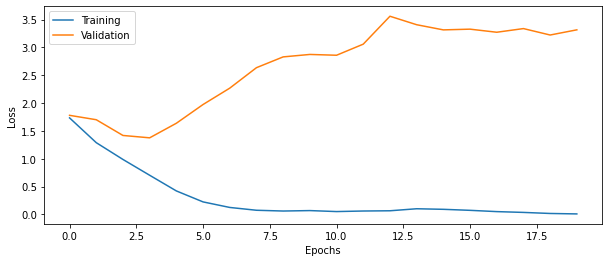

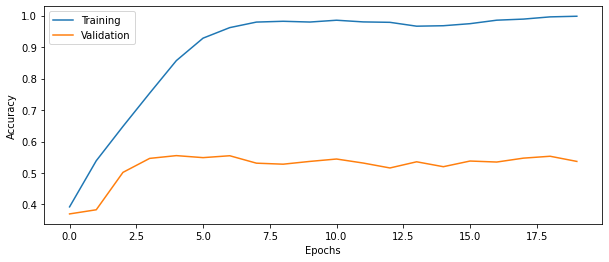

In [80]:
# Plot the history from the training run
plot_results(history2)

## 4 convolutional layers, 1 intermediate dense layer (50 nodes)

In [81]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model3 = build_CNN(input_shape, 
                   n_conv_layers=4, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=50, 
                   use_dropout=False, 
                   learning_rate=0.01)

# Train the model  using training data and validation data
history3 = model3.fit(x = Xtrain, 
                      y = Ytrain_cat,
                      epochs = epochs, 
                      batch_size = batch_size, 
                      validation_data = (Xval, Yval_cat))

Epoch 1/20
75/75 [==============================] - 14s 181ms/step - loss: 1.7958 - accuracy: 0.3556 - val_loss: 2.1454 - val_accuracy: 0.3256
Epoch 2/20
75/75 [==============================] - 13s 179ms/step - loss: 1.4055 - accuracy: 0.4831 - val_loss: 1.4451 - val_accuracy: 0.4716
Epoch 3/20
75/75 [==============================] - 13s 177ms/step - loss: 1.1909 - accuracy: 0.5696 - val_loss: 1.5947 - val_accuracy: 0.4716
Epoch 4/20
75/75 [==============================] - 14s 184ms/step - loss: 1.0033 - accuracy: 0.6407 - val_loss: 1.3356 - val_accuracy: 0.5436
Epoch 5/20
75/75 [==============================] - 14s 184ms/step - loss: 0.8349 - accuracy: 0.7019 - val_loss: 1.4899 - val_accuracy: 0.5608
Epoch 6/20
75/75 [==============================] - 14s 183ms/step - loss: 0.6359 - accuracy: 0.7757 - val_loss: 1.5998 - val_accuracy: 0.5752
Epoch 7/20
75/75 [==============================] - 14s 183ms/step - loss: 0.4856 - accuracy: 0.8305 - val_loss: 1.5796 - val_accuracy: 0.5996

In [82]:
# Evaluate the trained model on test set, not used in training or validation
score = model3.evaluate(Xtest, Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 8ms/step - loss: 2.0976 - accuracy: 0.6395
Test loss: 2.0976
Test accuracy: 0.6395


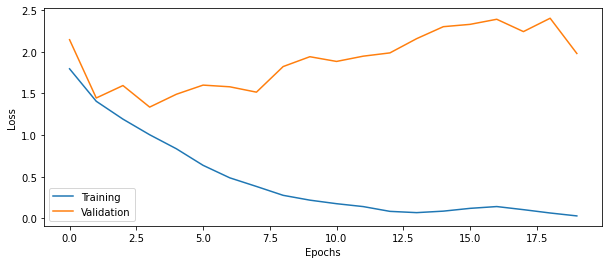

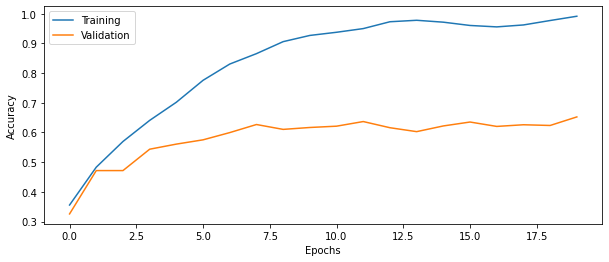

In [83]:
# Plot the history from the training run
plot_results(history3)

##  Part 13: Plot the CNN architecture

To understand your network better, print the architecture using `model.summary()`

Question 12: How many trainable parameters does your network have? Which part of the network contains most of the parameters?

Answer 12: 200,948 trainable parameters. The intermediate dense layer before the output layer has the most parameters at 102,450 params.

Question 13: What is the input to and output of a Conv2D layer? What are the dimensions of the input and output? 

Answer 13: The input and output of a Conv2D layer is a 4D tensor. 
Input 4+D tensor with shape: batch_shape + (channels, rows, cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (rows, cols, channels) if data_format='channels_last'. 
Output 4+D tensor with shape: batch_shape + (filters, new_rows, new_cols) if data_format='channels_first' or 4+D tensor with shape: batch_shape + (new_rows, new_cols, filters) if data_format='channels_last'. rows and cols values might have changed due to padding.

Question 14: Is the batch size always the first dimension of each 4D tensor? Check the documentation for Conv2D, https://keras.io/layers/convolutional/

Answer 14: Yes batch_size is always the first dimension of the 4D tensor.

Question 15: If a convolutional layer that contains 128 filters is applied to an input with 32 channels, what is the number of channels in the output?

Answer 15: Number of filters in the convolution layer determines the dimensions of the output space. In this example, the number of channels in the output would be 128. 

Question 16: Why is the number of parameters in each Conv2D layer *not* equal to the number of filters times the number of filter coefficients per filter (plus biases)?

Answer 16: This equality would hold in the case of greyscale image, where the number of channels of the input image is 1. But when we have an input with higher number of channels, then the filter would also convolve each channel separately and the number of parameters would increase that way.

Question 17: How does MaxPooling help in reducing the number of parameters to train?

Answer 17: MaxPooling replaces the output of the net at each location with the 'max' summary statistic of nearby outputs.  

In [84]:
# Print network architecture

model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_28 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_29 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)         

##  Part 14: Dropout regularization

Add dropout regularization to each intermediate dense layer, dropout probability 50%.

Question 18: How much did the test accuracy improve with dropout, compared to without dropout?

Answer 18: In the original configuration, we had added the Dropout layer after the BatchNormalization layer which actually lod to Test accuracy dropping for the CNN. Since this is not a very complex dataset and doesn't require many layers, regularization is not really required here and can actually result in a reduction in accuracy. But then we tried with the Dropout layer added before the BatchNormalization layer which gave a slight improvement (65.8% vs 63.9%)in the test accuracy.

Question 19: What other types of regularization can be applied? How can you add L2 regularization for the convolutional layers?

Answer 19: We can add L1 and L2 regularization to the Conv2D layers. This is called weight regularization where we can specify a kernel_regularizer for each layer which is by default set to 'None'. We can choose the appropriate regularizer from keras.regularizer i.e. l1 or l2.


## 4 convolutional layers, 1 intermediate dense layer (50 nodes), dropout

In [85]:
# Setup some training parameters
batch_size = 100
epochs = 20
input_shape = Xtrain.shape[1:]

# Build model
model4 = build_CNN(input_shape, 
                   n_conv_layers=4, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=50, 
                   use_dropout=True, 
                   learning_rate=0.01)

# Train the model  using training data and validation data
history4 = model4.fit(x = Xtrain, 
                      y = Ytrain_cat,
                      epochs = epochs, 
                      batch_size = batch_size, 
                      validation_data = (Xval, Yval_cat))

Epoch 1/20
75/75 [==============================] - 14s 182ms/step - loss: 1.9836 - accuracy: 0.2876 - val_loss: 1.7799 - val_accuracy: 0.3440
Epoch 2/20
75/75 [==============================] - 14s 180ms/step - loss: 1.6290 - accuracy: 0.3939 - val_loss: 1.4722 - val_accuracy: 0.4720
Epoch 3/20
75/75 [==============================] - 14s 186ms/step - loss: 1.4932 - accuracy: 0.4467 - val_loss: 1.4537 - val_accuracy: 0.4564
Epoch 4/20
75/75 [==============================] - 14s 185ms/step - loss: 1.3682 - accuracy: 0.4999 - val_loss: 1.3383 - val_accuracy: 0.5164
Epoch 5/20
75/75 [==============================] - 14s 185ms/step - loss: 1.2454 - accuracy: 0.5495 - val_loss: 1.9123 - val_accuracy: 0.4380
Epoch 6/20
75/75 [==============================] - 14s 186ms/step - loss: 1.1410 - accuracy: 0.5924 - val_loss: 1.4697 - val_accuracy: 0.5168
Epoch 7/20
75/75 [==============================] - 14s 186ms/step - loss: 1.0340 - accuracy: 0.6324 - val_loss: 1.1372 - val_accuracy: 0.6160

In [86]:
# Evaluate the trained model on test set, not used in training or validation
score = model4.evaluate(Xtest, Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 9ms/step - loss: 1.4979 - accuracy: 0.6580
Test loss: 1.4979
Test accuracy: 0.6580


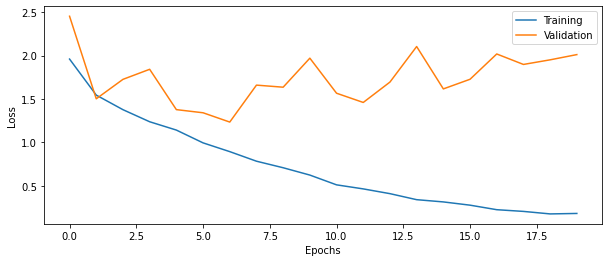

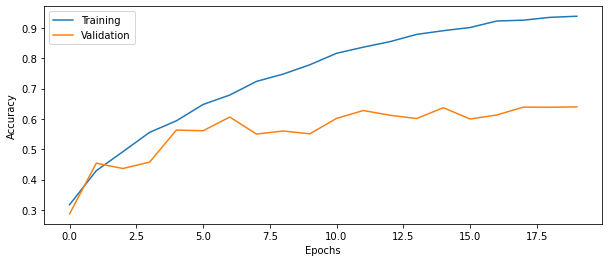

In [49]:
# Plot the history from the training run
plot_results(history4)

##  Part 15: Tweaking performance

You have now seen the basic building blocks of a 2D CNN. To further improve performance involves changing the number of convolutional layers, the number of filters per layer, the number of intermediate dense layers, the number of nodes in the intermediate dense layers, batch size, learning rate, number of epochs, etc. Spend some time (30 - 90 minutes) testing different settings.

Question 20: How high test accuracy can you obtain? What is your best configuration?

Answer 20: Since the dataset is not very complex and we are using a subset of the overall dataset, we chose to go with a simpler CNN. We did not employ regularization because it was giving us a lesser accuracy. The configuration used is:

batch_size = 200
epochs = 30
n_conv_layers=4
n_filters=16, 
n_dense_layers=1 
n_nodes=100 
use_dropout=False 
learning_rate=0.01

Test Accuracy achieved : 67.5%

## Your best config

In [93]:
# Setup some training parameters
batch_size = 200
epochs = 30
input_shape = Xtrain.shape[1:]

# Build model
model5 = build_CNN(input_shape, 
                   n_conv_layers=4, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=100, 
                   use_dropout=False, 
                   learning_rate=0.01)

# Train the model  using training data and validation data
history5 = model5.fit(x = Xtrain, 
                      y = Ytrain_cat,
                      epochs = epochs, 
                      batch_size = batch_size, 
                      validation_data = (Xval, Yval_cat))

Epoch 1/30
38/38 [==============================] - 13s 354ms/step - loss: 1.7892 - accuracy: 0.3727 - val_loss: 4.2944 - val_accuracy: 0.2244
Epoch 2/30
38/38 [==============================] - 13s 349ms/step - loss: 1.3390 - accuracy: 0.5108 - val_loss: 2.1306 - val_accuracy: 0.3412
Epoch 3/30
38/38 [==============================] - 13s 348ms/step - loss: 1.1387 - accuracy: 0.5860 - val_loss: 1.7021 - val_accuracy: 0.4276
Epoch 4/30
38/38 [==============================] - 13s 354ms/step - loss: 0.9412 - accuracy: 0.6655 - val_loss: 1.2453 - val_accuracy: 0.5756
Epoch 5/30
38/38 [==============================] - 14s 358ms/step - loss: 0.7559 - accuracy: 0.7333 - val_loss: 1.8067 - val_accuracy: 0.4732
Epoch 6/30
38/38 [==============================] - 14s 359ms/step - loss: 0.5763 - accuracy: 0.8008 - val_loss: 1.2520 - val_accuracy: 0.6236
Epoch 7/30
38/38 [==============================] - 14s 361ms/step - loss: 0.4284 - accuracy: 0.8515 - val_loss: 1.6653 - val_accuracy: 0.5832

In [94]:
# Evaluate the trained model on test set, not used in training or validation
score = model5.evaluate(Xtest, Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 8ms/step - loss: 1.9167 - accuracy: 0.6750
Test loss: 1.9167
Test accuracy: 0.6750


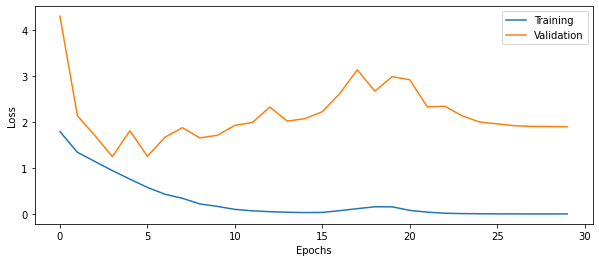

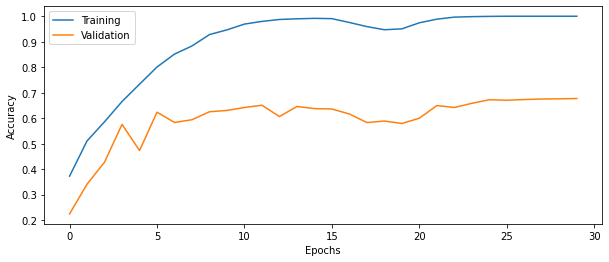

In [95]:
# Plot the history from the training run
plot_results(history5)

##  Part 16: Rotate the test images

How high is the test accuracy if we rotate the test images? In other words, how good is the CNN at generalizing to rotated images?

Rotate each test image 90 degrees, the cells are already finished.

Question 21: What is the test accuracy for rotated test images, compared to test images without rotation? Explain the difference in accuracy.

Answer 21: Test accuracy dropped to 25.2%. The difference in accuracy occurs because the features that the NN learns are not rotation invariant.

In [96]:
def myrotate(images):

    images_rot = np.rot90(images, axes=(1,2))
    
    return images_rot

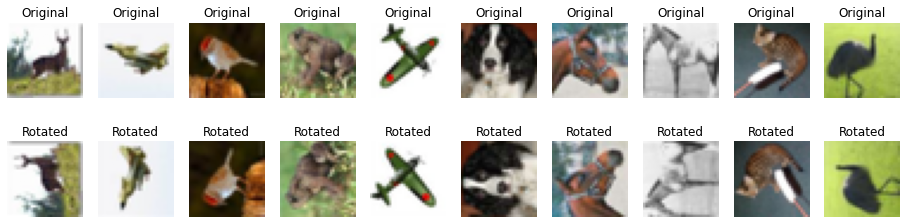

In [97]:
# Rotate the test images 90 degrees
Xtest_rotated = myrotate(Xtest)

# Look at some rotated images
plt.figure(figsize=(16,4))
for i in range(10):
    idx = np.random.randint(500)
    
    plt.subplot(2,10,i+1)
    plt.imshow(Xtest[idx]/2+0.5)
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(2,10,i+11)
    plt.imshow(Xtest_rotated[idx]/2+0.5)
    plt.title("Rotated")
    plt.axis('off')
plt.show()


In [98]:
# Evaluate the trained model on rotated test set
score = model5.evaluate(Xtest_rotated, Ytest_cat)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

63/63 [==============================] - 1s 8ms/step - loss: 6.9681 - accuracy: 0.2520
Test loss: 6.9681
Test accuracy: 0.2520


##  Part 17: Augmentation using Keras `ImageDataGenerator`

We can increase the number of training images through data augmentation (we now ignore that CIFAR10 actually has 60 000 training images). Image augmentation is about creating similar images, by performing operations such as rotation, scaling, elastic deformations and flipping of existing images. This will prevent overfitting, especially if all the training images are in a certain orientation.

We will perform the augmentation on the fly, using a built-in function in Keras, called `ImageDataGenerator`

See https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator , the .flow(x,y) functionality

In [106]:
# Get all 60 000 training images again. ImageDataGenerator manages validation data on its own
(Xtrain, Ytrain), _ = cifar10.load_data()

# Reduce number of images to 10,000
Xtrain = Xtrain[0:10000]
Ytrain = Ytrain[0:10000]

# Change data type and rescale range
Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain / 127.5 - 1

# Convert labels to hot encoding
Ytrain = to_categorical(Ytrain, 10)

In [107]:
# Set up a data generator with on-the-fly data augmentation, 20% validation split
# Use a rotation range of 30 degrees, horizontal and vertical flipping
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=30,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2)

# Setup a flow for training data, assume that we can fit all images into CPU memory

train_flow = datagen.flow(x = Xtrain,
                          y = Ytrain,
                          batch_size = batch_size)

# Setup a flow for validation data, assume that we can fit all images into CPU memory
validation_flow = datagen.flow(x = Xtrain,
                               y = Ytrain,
                               batch_size = batch_size)

## Part 18: What about big data?

Question 22: How would you change the code for the image generator if you cannot fit all training images in CPU memory? What is the disadvantage of doing that change?

Answer 22: We can reduce the batch size of the generator, but if the size of the batch is too small, then the replaced training images might be too few to learn the features. 

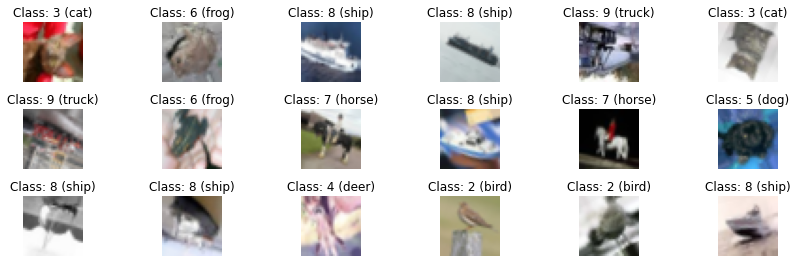

In [108]:
# Plot some augmented images
plot_datagen = datagen.flow(Xtrain, Ytrain, batch_size=1)

plt.figure(figsize=(12,4))
for i in range(18):
    (im, label) = plot_datagen.next()
    im = (im[0] + 1) * 127.5
    im = im.astype('int')
    label = np.flatnonzero(label)[0]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.title("Class: {} ({})".format(label, classes[label]))
    plt.axis('off')
plt.show()

## Part 19: Train the CNN with images from the generator

See https://keras.io/api/models/model_training_apis/#fit-method for how to use model.fit with a generator instead of a fix dataset (numpy arrays)

To make the comparison fair to training without augmentation

    steps_per_epoch should be set to: len(Xtrain)*(1 - validation_split)/batch_size

    validation_steps should be set to: len(Xtrain)*validation_split/batch_size

Question 23: How quickly is the training accuracy increasing compared to without augmentation? Explain why there is a difference compared to without augmentation. What parameter is necessary to change to perform more training?

Answer 23: Training accuracy converges much faster with augmentation. The augmentation uses a random sample of transformed images in each epoch. So in every epoch, the training set is different. This is why the NN learns features much faster. We can increase the number of epochs to train more or we can also specify more transformations in the generator that will lead to more types of samples.

Question 24: What other types of image augmentation can be applied, compared to what we use here?

Answer 24: We can apply other transformations such as zoom, shear, brightness control, horizontal and vertical shift of the images.

In [110]:
# Setup some training parameters
batch_size = 100
epochs = 200
input_shape = Xtrain.shape[1:]

# Build model (your best config)
model6 = build_CNN(input_shape, 
                   n_conv_layers=4, 
                   n_filters=16, 
                   n_dense_layers=1, 
                   n_nodes=100, 
                   use_dropout=False, 
                   learning_rate=0.01)

validation_split=0.2
    
# Train the model using on the fly augmentation
history6 = model6.fit(train_flow,
                      validation_data = validation_flow,
                      steps_per_epoch = len(Xtrain)*(1 - validation_split)/batch_size,
                      validation_steps = len(Xtrain)*validation_split/batch_size,
                      batch_size = batch_size,
                      epochs = epochs)

Epoch 1/200
80/80 [==============================] - 14s 173ms/step - loss: 1.9021 - accuracy: 0.3256 - val_loss: 2.1569 - val_accuracy: 0.2925
Epoch 2/200
80/80 [==============================] - 13s 168ms/step - loss: 1.6239 - accuracy: 0.4031 - val_loss: 1.8073 - val_accuracy: 0.3415
Epoch 3/200
80/80 [==============================] - 13s 168ms/step - loss: 1.5017 - accuracy: 0.4480 - val_loss: 1.5591 - val_accuracy: 0.4335
Epoch 4/200
80/80 [==============================] - 13s 168ms/step - loss: 1.4195 - accuracy: 0.4837 - val_loss: 1.7172 - val_accuracy: 0.4405
Epoch 5/200
80/80 [==============================] - 14s 172ms/step - loss: 1.3621 - accuracy: 0.5061 - val_loss: 1.8716 - val_accuracy: 0.4030
Epoch 6/200
80/80 [==============================] - 14s 172ms/step - loss: 1.3099 - accuracy: 0.5235 - val_loss: 1.3681 - val_accuracy: 0.5155
Epoch 7/200
80/80 [==============================] - 14s 173ms/step - loss: 1.2692 - accuracy: 0.5385 - val_loss: 1.3276 - val_accuracy:

80/80 [==============================] - 14s 169ms/step - loss: 0.5426 - accuracy: 0.8071 - val_loss: 0.6468 - val_accuracy: 0.7850
Epoch 58/200
80/80 [==============================] - 14s 169ms/step - loss: 0.5427 - accuracy: 0.8051 - val_loss: 0.5847 - val_accuracy: 0.7940
Epoch 59/200
80/80 [==============================] - 14s 173ms/step - loss: 0.5258 - accuracy: 0.8150 - val_loss: 0.5760 - val_accuracy: 0.7895
Epoch 60/200
80/80 [==============================] - 14s 173ms/step - loss: 0.5409 - accuracy: 0.8084 - val_loss: 0.5109 - val_accuracy: 0.8170
Epoch 61/200
80/80 [==============================] - 14s 175ms/step - loss: 0.5433 - accuracy: 0.8094 - val_loss: 0.5770 - val_accuracy: 0.7970
Epoch 62/200
80/80 [==============================] - 14s 171ms/step - loss: 0.5209 - accuracy: 0.8205 - val_loss: 0.5859 - val_accuracy: 0.8015
Epoch 63/200
80/80 [==============================] - 13s 169ms/step - loss: 0.5054 - accuracy: 0.8234 - val_loss: 0.5800 - val_accuracy: 0.791

80/80 [==============================] - 14s 173ms/step - loss: 0.3160 - accuracy: 0.8870 - val_loss: 0.3295 - val_accuracy: 0.8915
Epoch 114/200
80/80 [==============================] - 14s 170ms/step - loss: 0.3232 - accuracy: 0.8852 - val_loss: 0.3014 - val_accuracy: 0.8930
Epoch 115/200
80/80 [==============================] - 14s 170ms/step - loss: 0.3134 - accuracy: 0.8917 - val_loss: 0.3101 - val_accuracy: 0.8905
Epoch 116/200
80/80 [==============================] - 14s 173ms/step - loss: 0.3112 - accuracy: 0.8915 - val_loss: 0.3156 - val_accuracy: 0.8995
Epoch 117/200
80/80 [==============================] - 13s 167ms/step - loss: 0.3065 - accuracy: 0.8921 - val_loss: 0.2732 - val_accuracy: 0.8990
Epoch 118/200
80/80 [==============================] - 14s 174ms/step - loss: 0.2986 - accuracy: 0.8967 - val_loss: 0.3187 - val_accuracy: 0.8905
Epoch 119/200
80/80 [==============================] - 14s 169ms/step - loss: 0.3041 - accuracy: 0.8926 - val_loss: 0.3697 - val_accuracy:

80/80 [==============================] - 15s 188ms/step - loss: 0.2344 - accuracy: 0.9201 - val_loss: 0.2471 - val_accuracy: 0.9065
Epoch 170/200
80/80 [==============================] - 16s 194ms/step - loss: 0.2223 - accuracy: 0.9233 - val_loss: 0.2191 - val_accuracy: 0.9245
Epoch 171/200
80/80 [==============================] - 15s 187ms/step - loss: 0.2213 - accuracy: 0.9222 - val_loss: 0.2131 - val_accuracy: 0.9265
Epoch 172/200
80/80 [==============================] - 15s 187ms/step - loss: 0.2218 - accuracy: 0.9225 - val_loss: 0.2366 - val_accuracy: 0.9175
Epoch 173/200
80/80 [==============================] - 15s 186ms/step - loss: 0.2376 - accuracy: 0.9209 - val_loss: 0.2926 - val_accuracy: 0.9010
Epoch 174/200
80/80 [==============================] - 15s 190ms/step - loss: 0.2243 - accuracy: 0.9189 - val_loss: 0.3393 - val_accuracy: 0.8840
Epoch 175/200
80/80 [==============================] - 15s 189ms/step - loss: 0.2382 - accuracy: 0.9154 - val_loss: 0.2220 - val_accuracy:

In [113]:
# Check if there is still a big difference in accuracy for original and rotated test images

# Evaluate the trained model on original test set
score = model6.evaluate(Xtest, Ytest_cat, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

# Evaluate the trained model on rotated test set
score = model6.evaluate(Xtest_rotated, Ytest_cat, batch_size = batch_size, verbose=0)
print('Test loss: %.4f' % score[0])
print('Test accuracy: %.4f' % score[1])

Test loss: 1.7477
Test accuracy: 0.6770
Test loss: 5.1932
Test accuracy: 0.3180


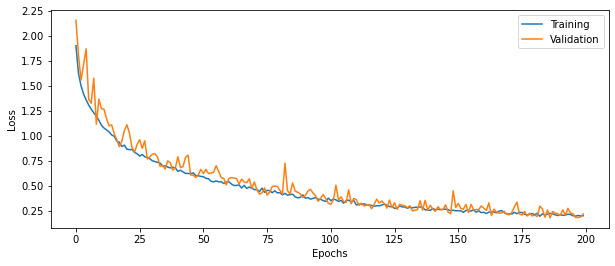

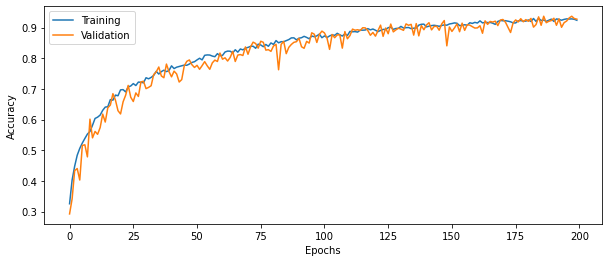

In [114]:
# Plot the history from the training run
plot_results(history6)

## Part 20: Plot misclassified images

Lets plot some images where the CNN performed badly, these cells are already finished.

In [115]:
# Find misclassified images
y_pred=model6.predict(Xtest) 
y_pred=np.argmax(y_pred,axis=1)

y_correct = np.argmax(Ytest,axis=-1)

miss = np.flatnonzero(y_correct != y_pred)

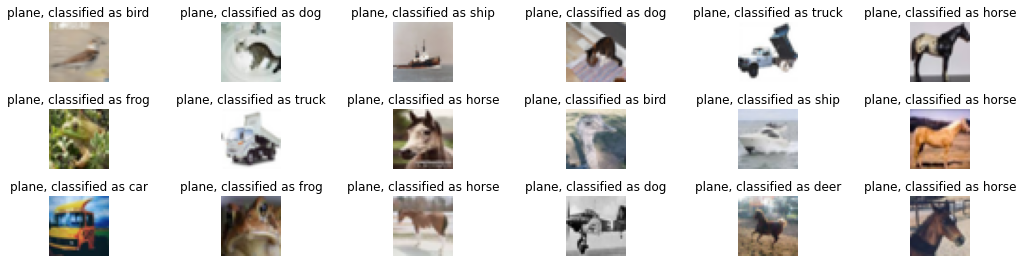

In [116]:
# Plot a few of them
plt.figure(figsize=(15,4))
perm = np.random.permutation(miss)
for i in range(18):
    im = (Xtest[perm[i]] + 1) * 127.5
    im = im.astype('int')
    label_correct = y_correct[perm[i]]
    label_pred = y_pred[perm[i]]
    
    plt.subplot(3,6,i+1)
    plt.tight_layout()
    plt.imshow(im)
    plt.axis('off')
    plt.title("{}, classified as {}".format(classes[label_correct], classes[label_pred]))
plt.show()

##  Part 21: Testing on another size

Question 25: This CNN has been trained on 32 x 32 images, can it be applied to images of another size? If not, why is this the case?

Answer 25: It is not possible directly, because we are currently giving a fixed input size becaause all out training images are the same size.

Question 26: Is it possible to design a CNN that can be trained on images of one size, and then applied to an image of any size? How?

Answer 26: We will have to resize the test image and use padding to bring it to the same dimensions as the training set. The resizing is important because we are currently giving a fixed input size becaause all out training images are the same size. We can make it more customizable by using the input size as (None, None, 3). This way the CNN can handle different sizes.

##  Part 22: Pre-trained 2D CNNs

There are many deep 2D CNNs that have been pre-trained using the large ImageNet database (several million images, 1000 classes). Import a pre-trained ResNet50 network from Keras applications. Show the network using `model.summary()`

Question 27: How many convolutional layers does ResNet50 have? 

Question 28: How many trainable parameters does the ResNet50 network have? 

Question 29: What is the size of the images that ResNet50 expects as input?

Question 30: Using the answer to question 28, explain why the second derivative is seldom used when training deep networks.

Apply the pre-trained CNN to 5 random color images that you download and copy to the cloud machine or your own computer. Are the predictions correct? How certain is the network of each image class?

These pre-trained networks can be fine tuned to your specific data, and normally only the last layers need to be re-trained, but it will still be too time consuming to do in this laboration.

See https://keras.io/api/applications/ and https://keras.io/api/applications/resnet/#resnet50-function 

Useful functions

`image.load_img` in tensorflow.keras.preprocessing

`image.img_to_array` in tensorflow.keras.preprocessing

`ResNet50` in tensorflow.keras.applications.resnet50

`preprocess_input` in tensorflow.keras.applications.resnet50

`decode_predictions` in tensorflow.keras.applications.resnet50

`expand_dims` in numpy


In [ ]:
# Your code for using pre-trained ResNet 50 on 5 color images of your choice. 
# The preprocessing should transform the image to a size that is expected by the CNN.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image

im_l= ['f35.png','airbus.jpg','slele.jpg','inele.jpg','afele.jpg']

for i in range(len(im_l)):
    im_name = im_l[i]
    im = image.load_img(im_name, target_size=(224, 224))
    x = image.img_to_array(im)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model_res = ResNet50()
    predLabs = decode_predictions(model_res.predict(x))
    print(predLabs)
    plt.imshow(im)
    plt.show()
